In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import darts

In [2]:
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import NBEATSModel
from darts import metrics

In [33]:
dataframe = pd.read_csv('AAPL.csv')['close']

In [29]:
dataframe.head()

,date,close,high,low,open,volume
0,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246
1,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309
2,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452
3,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797
4,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627


In [5]:
df


0       130.34
1       131.86
2       131.23
3       131.20
4       129.86
         ...  
1253    313.17
1254    315.03
1255    316.68
1256    318.66
1257    315.77
Name: open, Length: 1258, dtype: float64

In [11]:
df = np.array(df)

In [16]:
print(df, len(df))


[130.34 131.86 131.23 ... 316.68 318.66 315.77] 1258


In [17]:
df1 = df.reshape(len(df), 1)

In [18]:
df1

array([[130.34],
       [131.86],
       [131.23],
       ...,
       [316.68],
       [318.66],
       [315.77]])

In [34]:
TimeSeries.from_dataframe(dataframe, time_col=None, value_cols=None, fill_missing_dates=False, freq=None, fillna_value=None, static_covariates=None, hierarchy=None)

AttributeError: 'Series' object has no attribute 'columns'

In [37]:
df1 = TimeSeries.from_values(df1, columns=None, fillna_value=None, static_covariates=None, hierarchy=None)

In [36]:
datascaler = Scaler()

In [38]:
scaled_data = datascaler.fit_transform(df1)

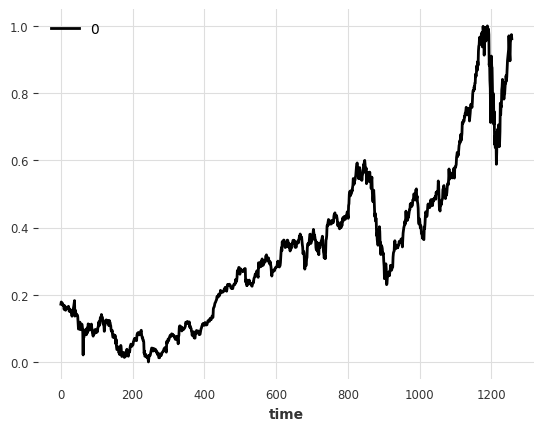

In [39]:
scaled_data.plot()

In [40]:
model = NBEATSModel(input_chunk_length = 50, output_chunk_length = 15, n_epochs = 100, random_state = 0)
model.fit(scaled_data, verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.4 M 
---------------------------------------------------
6.4 M     Trainable params
1.6 K     Non-trainable params
6.4 M     Total params
51.214    Total estimated model params size (MB)


Epoch 99: 100%|██████████| 38/38 [00:11<00:00,  3.23it/s, loss=0.000412, train_loss=0.000414]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|██████████| 38/38 [00:11<00:00,  3.22it/s, loss=0.000412, train_loss=0.000414]


In [3]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")
   

Please install GPU version of TF


In [4]:
prediction = model.predict(n=100)

prediction.plot()
scaled_data1 = scaled_data[700:]
scaled_data1.plot()

NameError: name 'model' is not defined